# Set up enviroment

In [1]:
# train:test 9:1 8:2 7:3
TEST_RATIO = 0.1
TRAIN_TEST_LABEL = f'{int(10-TEST_RATIO*10)}-{int(TEST_RATIO*10)}'
DATASET_NAME = 'EIB'
MODEL_NAME = 'LinearRegression'

In [2]:
import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

# Start

In [4]:
from sklearn.linear_model import LinearRegression

def buildModel():
  model = LinearRegression()
  return model

## Reading dataset

In [5]:
# dataset_path = '/content/drive/MyDrive/UIT/IS403/Source_Code_PTDLKD/Data Train 1-3-2019 1-3-2024/BIDV.csv'
df = pd.read_csv(f'{DATASET_NAME}.csv', index_col="Date")


In [6]:
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2019-03-01 00:00:00+07:00,12323.44629,12429.37891,12005.64941,12217.51367,101102
2019-03-04 00:00:00+07:00,12217.51367,12711.86426,12146.89258,12570.62109,1698208
2019-03-05 00:00:00+07:00,12570.62109,12570.62109,12252.82520,12252.82520,1940443
2019-03-06 00:00:00+07:00,12535.31055,12535.31055,12252.82520,12288.13574,40228
2019-03-07 00:00:00+07:00,12076.27148,12288.13574,12005.64941,12076.27148,4753044
2019-03-08 00:00:00+07:00,12005.64941,12429.37891,12005.64941,12252.82520,234447
2019-03-11 00:00:00+07:00,12076.27148,12394.06738,12076.27148,12252.82520,36136
2019-03-12 00:00:00+07:00,12252.82520,12500.00000,12252.82520,12500.00000,808790
2019-03-13 00:00:00+07:00,12570.62109,12641.24316,12464.68945,12570.62109,1816997


In [7]:
print(f"Data shape: {df.shape}")

Data shape: (1306, 5)


## Data preprocessing

### Checking duplicates and null values

In [8]:
print("Duplicated")
df.duplicated().sum()

Duplicated


0

In [9]:
print("Null")
df.isnull().sum()

Null


Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

### Checking DataFrame information

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 2019-03-01 00:00:00+07:00 to 2024-05-31 00:00:00+07:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1306 non-null   float64
 1   High    1306 non-null   float64
 2   Low     1306 non-null   float64
 3   Close   1306 non-null   float64
 4   Volume  1306 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 61.2+ KB


### Overview Data Descriptive statistic

In [11]:
df.describe()

,Open,High,Low,Close,Volume
count,1306.000000,1306.000000,1306.000000,1306.000000,1.306000e+03
mean,16650.377875,16922.427347,16382.154743,16673.737042,8.727535e+06
std,4287.076034,4367.722864,4171.046417,4257.231701,1.482414e+07
min,9887.005859,10593.220700,9887.005859,10346.044920,3.426000e+03
25%,12358.756840,12535.310550,12182.203130,12394.067380,7.778795e+05
50%,16995.762695,17245.763670,16605.084960,16949.152340,3.796930e+06
75%,19415.678225,19729.873535,19024.364747,19385.593750,1.121118e+07
max,29661.017580,29943.501950,27824.859380,29661.017580,1.941662e+08


## Linear Regression Model

### Split Data

In [12]:
df.reset_index(inplace=True)

features = df.index
target = df['Close']

def splitTrainTest(test_ratio):
    n_observations = len(df)

    train_size = int((1-test_ratio) * n_observations)
    test_size = n_observations - train_size

    x_train, x_test = (
        np.array(features[:train_size]).reshape(-1, 1),
        np.array(features[train_size:train_size + test_size]).reshape(-1, 1)
    )
    y_train, y_test = target[:train_size], target[train_size:train_size + test_size]

    return x_train, x_test, y_train, y_test

In [13]:
colors = plt.get_cmap('tab10').colors

In [14]:
def allResultPlots(data):
    (x_train, y_train, x_test, y_test, y_pred, x_next_90_days, y_next_90_days) = data

    figname = f'{DATASET_NAME} {TRAIN_TEST_LABEL}'
    plt.title(figname)
    plt.xlabel('Index')
    plt.ylabel('Price')

    # train
    plt.plot(x_train, y_train, color=colors[0])

    # test
    plt.plot(x_test, y_test, color=colors[1])
    plt.plot(x_test, y_pred, color=colors[2])

    # next 90 Days
    # plt.plot(x_next_90_days, y_next_90_days)
    plt.plot(x_next_90_days[0:30],y_next_90_days[0:30], color=colors[3])
    plt.plot(x_next_90_days[30:60],y_next_90_days[30:60], color=colors[4])
    plt.plot(x_next_90_days[60:90],y_next_90_days[60:90], color=colors[5])

    # save plots and show
    plt.legend(['Train', 'Test', 'Predictions (Test)','Predictions (Next30Days)','Predictions (Next60Days)','Predictions (Next90Days)'])
    
    plot_dir = "plots/result"
    if not os.path.exists(plot_dir):
        os.makedirs(plot_dir)
    figname = f'{DATASET_NAME}_{MODEL_NAME}_{TRAIN_TEST_LABEL}'
    plt.savefig(os.path.join(plot_dir, figname + ".png"), bbox_inches='tight')

    plt.show()

In [15]:
def next90DaysPlot(data):
    (x_next_90_days, y_next_90_days) = data

    plt.title("Next 90 Days")
    # plt.plot(x_next_90_days, y_next_90_days)
    plt.plot(x_next_90_days[0:30],y_next_90_days[0:30], color=colors[3])
    plt.plot(x_next_90_days[30:60],y_next_90_days[30:60], color=colors[4])
    plt.plot(x_next_90_days[60:90],y_next_90_days[60:90], color=colors[5])

    # save plots and show
    plt.legend(['Predictions (Next30Days)','Predictions (Next60Days)','Predictions (Next90Days)'])
    # Ensure the directory exists
    plot_dir = "plots/predicted"
    if not os.path.exists(plot_dir):
        os.makedirs(plot_dir)
    
    figname = f'{DATASET_NAME}_{MODEL_NAME}_{TRAIN_TEST_LABEL}_90Days'
    plt.savefig(os.path.join(plot_dir, figname + ".png"), bbox_inches='tight')
    
    plt.show()

In [16]:
def evaluateAccuracy(y_test, y_pred):
    test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
    print('Testing RMSE:', test_rmse)

    test_mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
    print('Testing MAPE:', test_mape)

    test_mae = np.mean(abs(y_pred - y_test))
    print('Testing MAE:', test_mae)

In [17]:
print("==============================")
print('Test Ratio: ', TEST_RATIO)

#====Start-Linear-Regression-model====#
# split train test by test_ratio
x_train, x_test, y_train, y_test= splitTrainTest(TEST_RATIO)

print("Train: ", x_train.shape)
print("Test: ", x_test.shape)

# create linear regression model
model = buildModel()
model.fit(x_train, y_train)

# make prediction
y_pred = model.predict(x_test)

# compare actual and predicted price
comparison_data = {'Actual_Price':y_test, 'Predicted_Price':y_pred}
comparison_table = pd.DataFrame(comparison_data)
print(comparison_table)

# evaluate accuracy
evaluateAccuracy(y_test, y_pred)
#====End-Linear-Regression-model====#



#====Start-Predick-next-90-days====#
print("==============================")
last_index =  df.index[-1]
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)
print("Next 90 Days:")
print(y_next_90_days)
#====End-Predick-next-90-days====#

Test Ratio:  0.1
Train:  (1175, 1)
Test:  (131, 1)
      Actual_Price  Predicted_Price
1175       17800.0     21731.424882
1176       19000.0     21740.360580
1177       19200.0     21749.296278
1178       19100.0     21758.231976
1179       18600.0     21767.167674
...            ...              ...
1301       18800.0     22857.322814
1302       18750.0     22866.258512
1303       19650.0     22875.194210
1304       19700.0     22884.129908
1305       19950.0     22893.065606

[131 rows x 2 columns]
Testing RMSE: 3966.9470843703325
Testing MAPE: 0.21201153159649203
Testing MAE: 3875.985701890346
Next 90 Days:
[22902.00130345 22910.93700132 22919.87269919 22928.80839706
 22937.74409494 22946.67979281 22955.61549068 22964.55118855
 22973.48688642 22982.4225843  22991.35828217 23000.29398004
 23009.22967791 23018.16537579 23027.10107366 23036.03677153
 23044.9724694  23053.90816728 23062.84386515 23071.77956302
 23080.71526089 23089.65095876 23098.58665664 23107.52235451
 23116.45805238

All Result


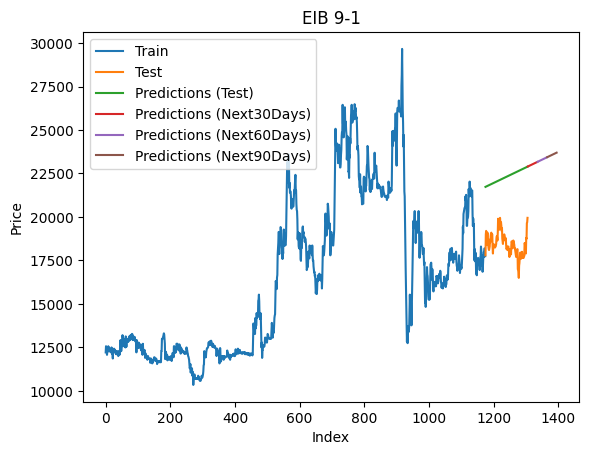

Next 90 days prediction


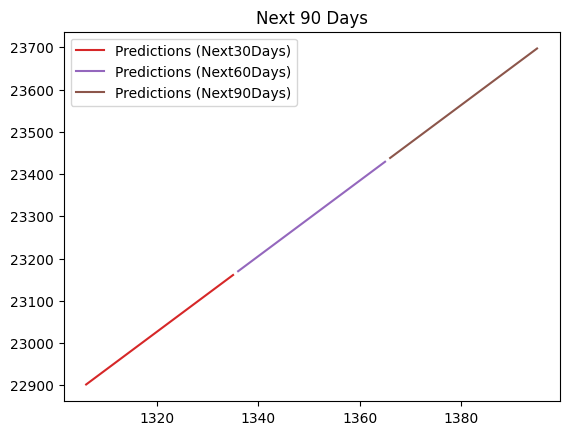

In [18]:
# use plots to display data
# all
print('All Result')
allResultPlots((x_train , y_train, x_test, y_test, y_pred, x_next_90_days, y_next_90_days))
# next 90 Days
print('Next 90 days prediction')
next90DaysPlot((x_next_90_days, y_next_90_days))